In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('Ecommerce Customers.csv')

In [5]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [9]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [10]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

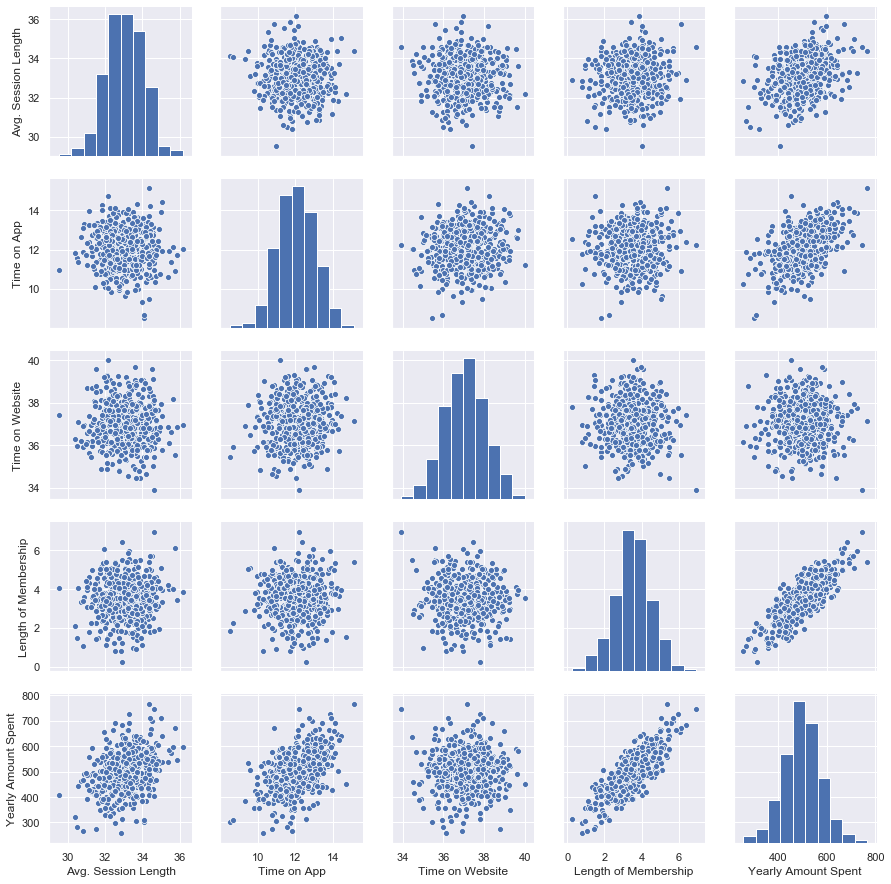

In [11]:
sns.set()
sns.pairplot(df)

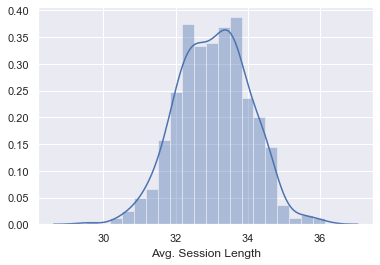

In [12]:
sns.distplot(df['Avg. Session Length'])

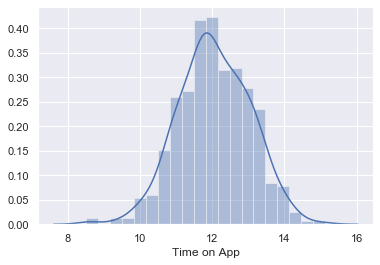

In [13]:
sns.distplot(df['Time on App'])

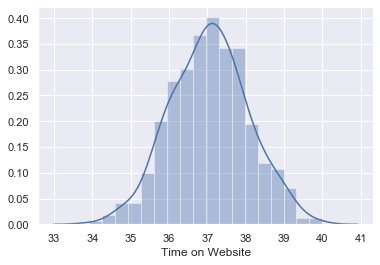

In [14]:
sns.distplot(df['Time on Website'])

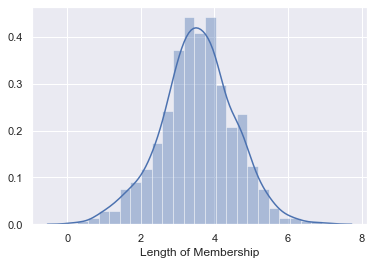

In [15]:
sns.distplot(df['Length of Membership'])

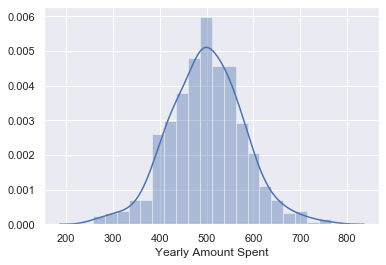

In [16]:
sns.distplot(df['Yearly Amount Spent'])

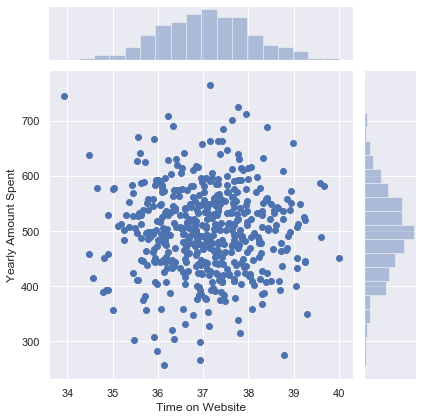

In [17]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df,kind='scatter')

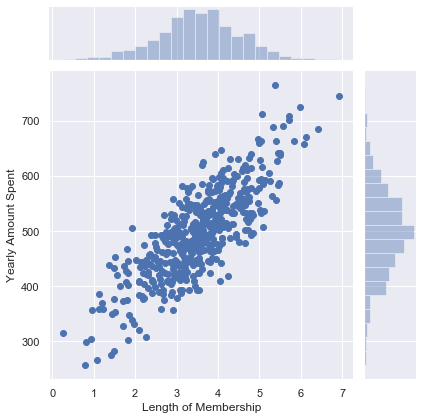

In [25]:
sns.jointplot(x='Length of Membership', y='Yearly Amount Spent' ,data=df,kind='scatter')

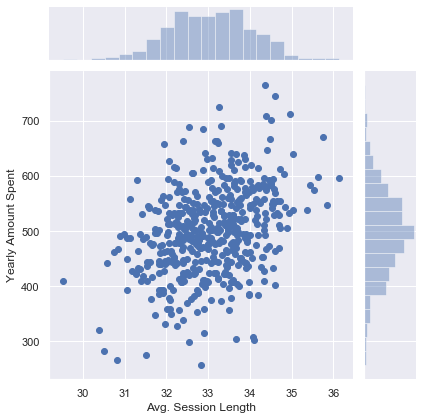

In [26]:
sns.jointplot(x='Avg. Session Length', y='Yearly Amount Spent',data=df,kind='scatter')

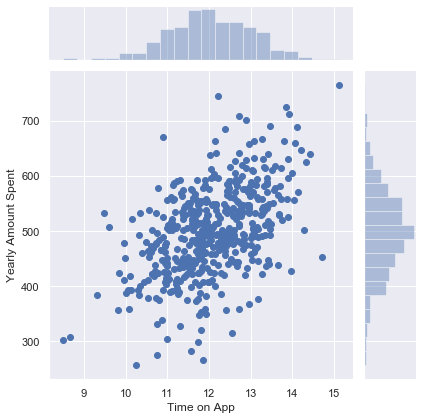

In [18]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df,kind='scatter')

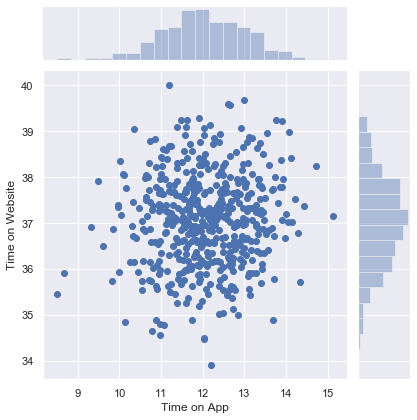

In [28]:
sns.jointplot(x='Time on App', y='Time on Website',data=df,kind='scatter')

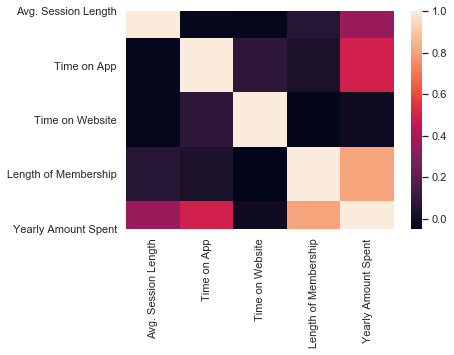

In [23]:
sns.heatmap(df.corr())

In [29]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [30]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
df_model = LinearRegression()

In [35]:
df_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
corr_coeff_df = pd.DataFrame(df_model.coef_, X.columns, columns = ['Correlation Coefficient'])
corr_coeff_df

,Correlation Coefficient
Avg. Session Length,25.895360
Time on App,38.844165
Time on Website,0.967948
Length of Membership,61.869225


In [38]:
predictions = df_model.predict(X_test)

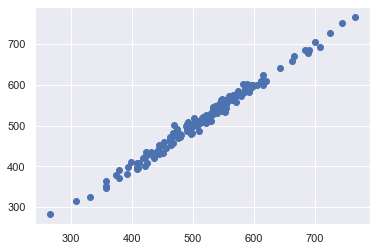

In [39]:
plt.scatter(y_test,predictions)

In [40]:
from sklearn import metrics 

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.89667098496289
MSE: 93.83097002877338
RMSE: 9.686638737393555


In [43]:
metrics.explained_variance_score(y_test, predictions)

0.9871755014068053

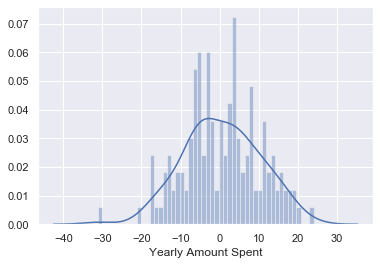

In [44]:
sns.distplot((y_test-predictions),bins=50)